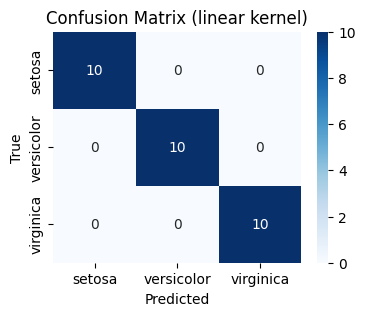


Kernel: linear
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



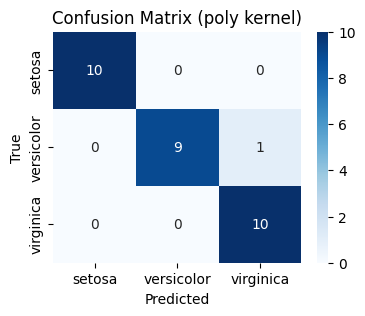


Kernel: poly
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



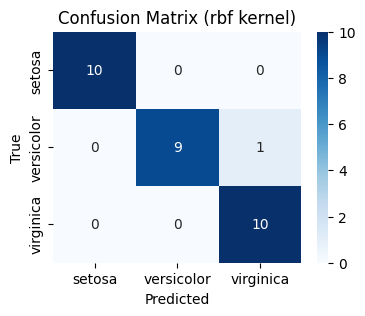


Kernel: rbf
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Performance Comparison:

           linear      poly       rbf
Accuracy      1.0  0.966667  0.966667
Precision     1.0  0.969697  0.969697
Recall        1.0  0.966667  0.966667
F1-Score      1.0  0.966583  0.966583

Best Performing Kernel: LINEAR (Accuracy = 1.0000)


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, degree=3 if kernel == 'poly' else 0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[kernel] = [acc, prec, rec, f1]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)

    plt.title(f'Confusion Matrix ({kernel} kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print(f"\nKernel: {kernel}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\nPerformance Comparison:\n")
print(results_df)

best_kernel = results_df.loc['Accuracy'].idxmax()
print(f"\nBest Performing Kernel: {best_kernel.upper()} (Accuracy = {results_df.loc['Accuracy', best_kernel]:.4f})")


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_no_scale = SVC(kernel='rbf')
model_no_scale.fit(X_train, y_train)
train_acc_no = model_no_scale.score(X_train, y_train)
test_acc_no = model_no_scale.score(X_test, y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train)
train_acc_scaled = model_scaled.score(X_train_scaled, y_train)
test_acc_scaled = model_scaled.score(X_test_scaled, y_test)

results_compare = pd.DataFrame({
    'Training Accuracy': [train_acc_no, train_acc_scaled],
    'Testing Accuracy': [test_acc_no, test_acc_scaled]
}, index=['Without Scaling', 'With Scaling'])

print("\nSVM (RBF Kernel) Performance Comparison:\n")
print(results_compare)



SVM (RBF Kernel) Performance Comparison:

                 Training Accuracy  Testing Accuracy
Without Scaling           0.918681          0.929825
With Scaling              0.982418          0.982456
